In [ ]:
%matplotlib inline

import seaborn as sns  # Будем визуализировать данные этой библиотекой
import pandas as pd  # Библиотека для работы с датафреймом
from tensorflow.keras import utils  # Будем использовать эту библиотеку для преобразования в One Hot
import numpy as np  # Библиотека для работы с массивами
import matplotlib.pyplot as plt  # Будем визуализировать данные этой библиотекой

from sklearn.preprocessing import StandardScaler  # Для нормализации данных
import re  # Регулярные выражения для эффективной работы со строками

# графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg'

In [ ]:
hh_df = pd.read_csv('https://drive.usercontent.google.com/u/0/uc?id=1PS-nIBE72b6dAO7VmyAne3gtv0Rk7a04&export=download')  # отсюда выгружаем файл

In [ ]:
hh_df.head(10)  # Верхушка таблицы

,Пол,Возраст,ЗП,Город,Занятость,График,Опыт (двойное нажатие для полной версии),Образование и ВУЗ
0,М,44,27000.0,малый или за пределами России город,полная занятость,полный день,73,среднее специальное
1,М,42,60000.0,Сочи,частичная занятость полная занятость,гибкий график полный день,230,высшее
2,М,45,65000.0,малый или за пределами России город,полная занятость,полный день удаленная работа,237,высшее
3,М,44,70000.0,Москва,полная занятость,гибкий график полный день удаленная работа,69,высшее
4,М,41,45000.0,малый или за пределами России город,частичная занятость полная занятость,полный день сменный график,161,высшее
5,М,36,50000.0,Казань,полная занятость,полный день,155,высшее
6,Ж,32,17000.0,малый или за пределами России город,полная занятость,полный день,94,среднее специальное
7,М,41,80000.0,Москва,полная занятость,полный день,200,высшее
8,Ж,42,120000.0,Москва,полная занятость,полный день,173,высшее
9,М,46,120000.0,малый или за пределами России город,частичная занятость проектная работа полная за...,гибкий график полный день сменный график удале...,256,высшее


In [ ]:
anomaly_age = hh_df[(hh_df['Возраст'] < 15) | (hh_df['Возраст'] > 75)][['Возраст']]

anomaly_salary = hh_df[(hh_df['ЗП'] < 1000) | (hh_df['ЗП'] > 1000000)][['ЗП']]


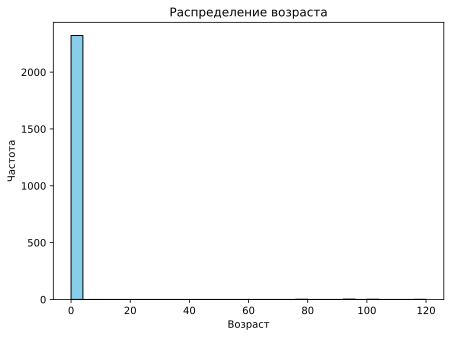

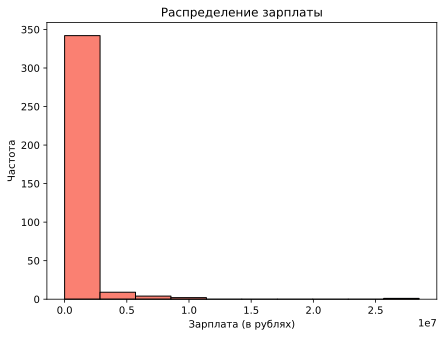

In [ ]:
plt.figure(figsize=(7, 5))
plt.hist(anomaly_age['Возраст'], bins=30, color='skyblue', edgecolor='black')
plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()


plt.figure(figsize=(7, 5))
plt.hist(anomaly_salary['ЗП'], bins=10, color='salmon', edgecolor='black')
plt.title('Распределение зарплаты')
plt.xlabel('Зарплата (в рублях)')
plt.ylabel('Частота')
plt.show()

In [ ]:
no_gender_data = hh_df[hh_df['Пол'] == 'Не указан']


# Вычисление статистики по возрасту
age_count = no_gender_data['Возраст'].count()
age_mean = no_gender_data['Возраст'].mean()

# Вычисление статистики по зарплате
salary_count = no_gender_data['ЗП'].count()
salary_mean = no_gender_data['ЗП'].mean()

# Вычисление статистики по опыту
experience_count = no_gender_data['Опыт (двойное нажатие для полной версии)'].count()
experience_mean = no_gender_data['Опыт (двойное нажатие для полной версии)'].mean()

# Статистика для категориальных переменных: Город, Занятость, График, Образование и ВУЗ
city_counts = no_gender_data['Город'].value_counts()
employment_counts = no_gender_data['Занятость'].value_counts()
schedule_counts = no_gender_data['График'].value_counts()
education_counts = no_gender_data['Образование и ВУЗ'].value_counts()

print(f"Статистика по возрасту:")
print(f"Количество людей: {age_count}")
print(f"Средний возраст: {age_mean} лет")
print()

print(f"Статистика по зарплате:")
print(f"Количество людей: {salary_count}")
print(f"Средняя зарплата: {salary_mean} рублей")
print()

print(f"Статистика по опыту:")
print(f"Количество людей: {experience_count}")
print(f"Средний опыт: {experience_mean}")
print("\n")

city_counts, employment_counts, schedule_counts, education_counts


Статистика по возрасту:
Количество людей: 1766
Средний возраст: 32.10815402038505 лет

Статистика по зарплате:
Количество людей: 1766
Средняя зарплата: 168444.47366930917 рублей

Статистика по опыту:
Количество людей: 1766
Средний опыт: 128.99490373725934




(Город
 малый или за пределами России город    1766
 Name: count, dtype: int64,
 Занятость
 полная занятость                                                    1073
 частичная занятость проектная работа полная занятость                304
 частичная занятость полная занятость                                 124
 проектная работа полная занятость                                     94
 стажировка частичная занятость проектная работа полная занятость      92
 частичная занятость проектная работа                                  18
 стажировка частичная занятость полная занятость                       15
 стажировка полная занятость                                           13
 частичная занятость                                                   10
 стажировка частичная занятость проектная работа                       10
 стажировка проектная работа полная занятость                           6
 стажировка частичная занятость                                         3
 стажировка проектная

In [ ]:
raw_hh_data = pd.read_csv('https://drive.usercontent.google.com/u/0/uc?id=1HoZroO2U-ap73BFQgtG5w8IiZE9uXNgq&export=download')

In [ ]:
# Приводим столбец "ЗП" к строковому типу
raw_hh_data['ЗП'] = raw_hh_data['ЗП'].astype(str)

# Очистим столбец "ЗП" от символов валют и пробелов
raw_hh_data['ЗП'] = raw_hh_data['ЗП'].replace({' руб.': '', ' ': '', ',': '.'}, regex=True)

# Преобразуем "EUR" и "USD" в соответствующие числовые значения
raw_hh_data.loc[raw_hh_data['ЗП'].str.contains('EUR', case=False, na=False), 'ЗП'] = raw_hh_data['ЗП'].replace({'EUR': ''}, regex=False) * 100
raw_hh_data.loc[raw_hh_data['ЗП'].str.contains('USD', case=False, na=False), 'ЗП'] = raw_hh_data['ЗП'].replace({'USD': ''}, regex=False) * 88

# Заполняем пропущенные значения (NaN) 0
raw_hh_data['ЗП'] = raw_hh_data['ЗП'].fillna(0)

# Преобразуем в числовой формат
raw_hh_data['ЗП'] = pd.to_numeric(raw_hh_data['ЗП'], errors='coerce')



In [ ]:
java_developers = raw_hh_data[raw_hh_data['Ищет работу на должность:'].str.contains('Java', case=False, na=False)]
python_developers = raw_hh_data[raw_hh_data['Ищет работу на должность:'].str.contains('Python', case=False, na=False)]
cpp_developers = raw_hh_data[raw_hh_data['Ищет работу на должность:'].str.contains('C++', case=False, na=False)]

java_count = java_developers.shape[0]
java_avg_salary = java_developers['ЗП'].mean()

python_count = python_developers.shape[0]
python_avg_salary = python_developers['ЗП'].mean()

cpp_count = cpp_developers.shape[0]
cpp_avg_salary = cpp_developers['ЗП'].mean()

print(f"Статистика по языкам программирования:\n")
print(f"Java:")
print(f"  - Количество вакансий: {java_count}")
print(f"  - Средняя зарплата: {java_avg_salary:,.2f} рублей\n")

print(f"Python:")
print(f"  - Количество вакансий: {python_count}")
print(f"  - Средняя зарплата: {python_avg_salary:,.2f} рублей\n")

print(f"C++:")
print(f"  - Количество вакансий: {cpp_count}")
print(f"  - Средняя зарплата: {cpp_avg_salary:,.2f} рублей\n")




Статистика по языкам программирования:

Java:
  - Количество вакансий: 63
  - Средняя зарплата: 98,392.86 рублей

Python:
  - Количество вакансий: 30
  - Средняя зарплата: 120,384.62 рублей

C++:
  - Количество вакансий: 510
  - Средняя зарплата: 99,880.78 рублей



# ЭТО ПРО ЭТО ПРО ЭТО ПРО ЭТО ПРО ЭТО ПРО ЭТО ПРО

In [ ]:
msc_parsed = pd.read_csv('https://drive.usercontent.google.com/u/0/uc?id=1x4whq4ApJIaTxgMy41LYJXesSNteE5J9&export=download')

/tmp/ipython-input-3088032585.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  msc_parsed = pd.read_csv('https://drive.usercontent.google.com/u/0/uc?id=1x4whq4ApJIaTxgMy41LYJXesSNteE5J9&export=download')


In [ ]:
msc_parsed.head(10)

,Unnamed: 0,Комнат,Метро / ЖД станции,От станции,Дом,Балкон,Санузел,Площадь,"Цена, руб.",ГРМ,Бонус агенту,Дата,Кол-во дней в экспозиции
0,0,1.0,Шелепиха м.,12п,35/37 М,NaN,2,64.1/23/20,19500000.0,NaN,NaN,25.07.2019,1.0
1,1,1.0,Пятницкое шоссе м.,30т,11/14 П,Л,Р,38.4/17/9,4800000.0,NaN,NaN,25.07.2019,2.0
2,2,1.0,Планерная м.,5т,11/22 П,Б,С,38.2/19.9/9.9,7990000.0,NaN,NaN,25.07.2019,4.0
3,3,1.0,Шаболовская м.,12п,8/12 ?,Б,Р,38/15/7,11200000.0,NaN,NaN,25.07.2019,7.0
4,4,1.0,Бабушкинская м.,15п,4/14 П,NaN,С,34/17/8,6250000.0,NaN,NaN,25.07.2019,11.0
5,5,1.0,Шелепиха м.,15п,9/36 К,NaN,NaN,44/14.7/19.2,12700000.0,NaN,NaN,25.07.2019,11.0
6,6,1.0,Улица Дмитриевского м.,2п,7/16 П,Л,Р,43/20/8,6500000.0,NaN,NaN,25.07.2019,14.0
7,7,1.0,Бульвар Рокоссовского м.,2п,2/5 К,Б,С,31/17/6,6000000.0,NaN,NaN,25.07.2019,15.0
8,8,1.0,Марьина Роща м.,10п,7/14 П,2Б,NaN,38.9/20.9/8.5,8900000.0,NaN,NaN,25.07.2019,16.0
9,9,1.0,Марьино м.,20п,10/24 М-К,NaN,-,30.9/17.9/10,5999984.0,NaN,NaN,25.07.2019,16.0


In [ ]:

if "Unnamed: 0" in msc_parsed.columns:
    msc_parsed = msc_parsed.drop(columns=["Unnamed: 0"])


def parse_rooms(x):
    if pd.isna(x):
        return np.nan
    try:
        return float(x)
    except Exception:
        s = str(x).lower()
        if "студ" in s:
            return 1.0
        if "своб" in s:
            return np.nan
        import re
        m = re.search(r"\d+", s)
        if m:
            return float(m.group(0))
        return np.nan

def parse_distance(x):
    if pd.isna(x):
        return np.nan, np.nan
    s = str(x).strip().lower()
    import re
    m = re.search(r"(\d+)", s)
    minutes = float(m.group(1)) if m else np.nan
    is_walk = 1.0 if "п" in s else (0.0 if "т" in s else np.nan)
    return minutes, is_walk

def parse_house(info):
    if pd.isna(info):
        return np.nan, np.nan, None
    s = str(info)
    import re
    m = re.search(r"(\d+)\s*/\s*(\d+)", s)
    floor = float(m.group(1)) if m else np.nan
    max_floor = float(m.group(2)) if m else np.nan
    material = None
    if m:
        rest = s[m.end():].strip()
        material = rest if rest else None
    return floor, max_floor, material

def parse_area(a):
    if pd.isna(a):
        return np.nan
    s = str(a).replace(",", ".")
    first = s.split("/")[0]
    try:
        return float(first)
    except Exception:
        import re
        m = re.search(r"(\d+(\.\d+)?)", first)
        if m:
            return float(m.group(1))
        return np.nan


msc_parsed["Комнат_число"] = msc_parsed["Комнат"].apply(parse_rooms)

dist_parsed = msc_parsed["От станции"].apply(parse_distance)
msc_parsed["Минут_до_станции"] = dist_parsed.apply(lambda x: x[0])
msc_parsed["Пешком_от_станции"] = dist_parsed.apply(lambda x: x[1])

house_parsed = msc_parsed["Дом"].apply(parse_house)
msc_parsed["Этаж"] = house_parsed.apply(lambda x: x[0])
msc_parsed["Этажность_дома"] = house_parsed.apply(lambda x: x[1])
msc_parsed["Материал_дома"] = house_parsed.apply(lambda x: x[2])

msc_parsed["Площадь_общая"] = msc_parsed["Площадь"].apply(parse_area)

msc_parsed["Дата_объявления"] = pd.to_datetime(msc_parsed["Дата"], format="%d.%m.%Y", errors="coerce")

if "Кол-во дней в экспозиции" in msc_parsed.columns:
    msc_parsed["Кол-во дней в экспозиции"] = pd.to_numeric(
        msc_parsed["Кол-во дней в экспозиции"], errors="coerce"
    )

categorical_cols = [
    "Метро / ЖД станции",
    "Балкон",
    "Санузел",
    "Материал_дома",
]

msc_encoded = pd.get_dummies(msc_parsed, columns=categorical_cols, drop_first=True)

numeric_df = msc_encoded.select_dtypes(include=[np.number]).copy()
numeric_df = numeric_df[~numeric_df["Цена, руб."].isna()]

corr_with_price = numeric_df.corr()["Цена, руб."].sort_values(ascending=False)
corr_abs_no_price = corr_with_price.drop("Цена, руб.")
top20 = corr_abs_no_price.abs().sort_values(ascending=False).head(20)

top20


,"Цена, руб."
Площадь_общая,0.799164
Комнат_число,0.588120
Кол-во дней в экспозиции,0.149854
Пешком_от_станции,0.109348
Минут_до_станции,0.050084
Этаж,0.040792
Этажность_дома,0.031891


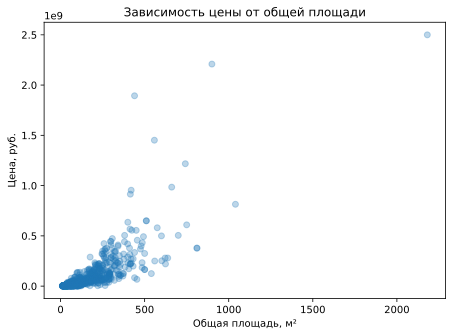

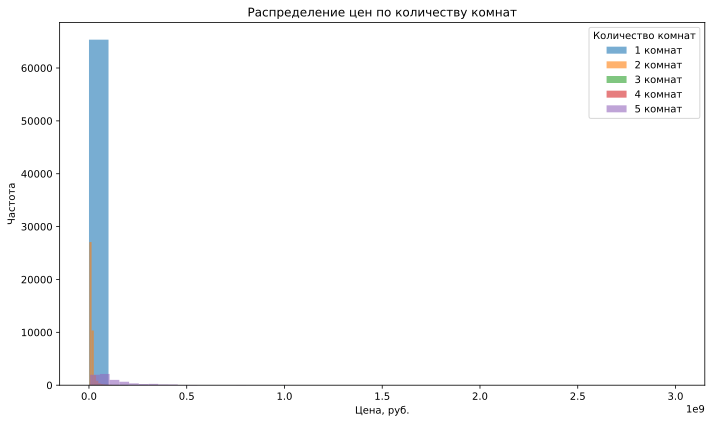

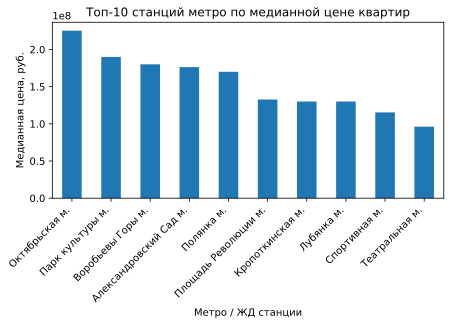

,"Цена, руб."
Метро / ЖД станции,
Октябрьская м.,225306320.0
Парк культуры м.,190000000.0
Воробьевы Горы м.,180000000.0
Александровский Сад м.,176224150.0
Полянка м.,170000000.0
Площадь Революции м.,132630120.0
Кропоткинская м.,130000000.0
Лубянка м.,130000000.0
Спортивная м.,115398456.0


In [ ]:

sample = msc_parsed.sample(5000, random_state=42) if len(msc_parsed) > 5000 else msc_parsed

plt.figure()
plt.scatter(sample["Площадь_общая"], sample["Цена, руб."], alpha=0.3)
plt.xlabel("Общая площадь, м²")
plt.ylabel("Цена, руб.")
plt.title("Зависимость цены от общей площади")
plt.tight_layout()
plt.show()


rooms_subset = msc_parsed[(msc_parsed["Комнат_число"].isin([1, 2, 3, 4, 5]))]

# Plotting histograms
plt.figure(figsize=(10, 6))
for rooms in [1, 2, 3, 4, 5]:
    plt.hist(rooms_subset[rooms_subset["Комнат_число"] == rooms]["Цена, руб."], bins=30, alpha=0.6, label=f"{rooms} комнат")

plt.xlabel("Цена, руб.")
plt.ylabel("Частота")
plt.title("Распределение цен по количеству комнат")
plt.legend(title="Количество комнат")
plt.tight_layout()
plt.show()


metro_price = msc_parsed.groupby("Метро / ЖД станции")["Цена, руб."].median().dropna()
top10_metro = metro_price.sort_values(ascending=False).head(10)

plt.figure()
top10_metro.plot(kind="bar")
plt.ylabel("Медианная цена, руб.")
plt.title("Топ-10 станций метро по медианной цене квартир")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

top10_metro


In [ ]:

for col in ["Площадь_общая", "Комнат_число", "Минут_до_станции", "Пешком_от_станции", "Этаж", "Этажность_дома"]:
    if col in numeric_df.columns:
        print(col, numeric_df["Цена, руб."].corr(numeric_df[col]))


Площадь_общая 0.7991638424452144
Комнат_число 0.5881196106761236
Минут_до_станции -0.05008448708746167
Пешком_от_станции 0.10934840118445951
Этаж 0.04079197544310311
Этажность_дома -0.031890979148722284


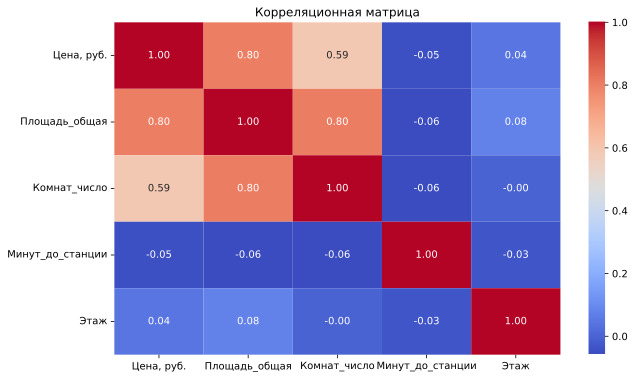

In [ ]:
correlation_matrix = msc_parsed[["Цена, руб.", "Площадь_общая", "Комнат_число", "Минут_до_станции",  "Этаж"]].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица')
plt.show()